(np.float64(-5.128942727142494),
 np.float64(6.95453740290161),
 np.float64(0.021081884418230112),
 np.float64(11.73445529478794))

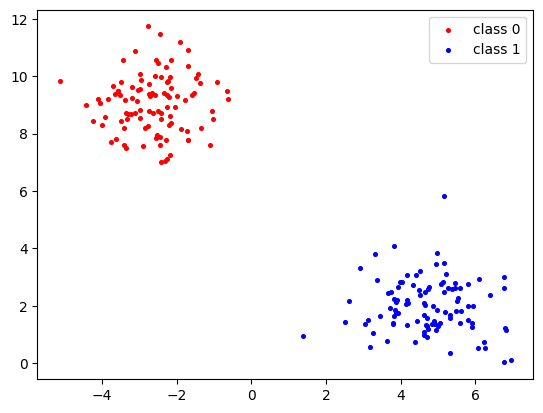

In [4]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=200, centers=2, random_state=42)
X[:5], y[:5]

plt.scatter(X[:,0][y==0],X[:,1][y==0],c='r',s=7,label='class 0')
plt.scatter(X[:,0][y==1],X[:,1][y==1],c='b',s=7,label='class 1')
plt.legend()
X[:,0].min(), X[:,0].max(), X[:,1].min(), X[:,1].max()

In [5]:
def visualize_output_2D(X,y,W,b):
    try:
        w0,w1 = W
    except:
        Exception('Weights(W) must be a 2D array')

    plt.scatter(X[:,0][y==0],X[:,1][y==0],c='r',s=7,label='class 0')
    plt.scatter(X[:,0][y==1],X[:,1][y==1],c='b',s=7,label='class 1')
    plt.xlabel('X1')
    plt.ylabel('X0')

    # w0x0+w1x1+b=0
    # x1 = (-w0x0-b)/w1
    # x1 = (-w0x0-b)/w1
    xmin = X[:,0].min()
    xmax = X[:,0].max()
    ymin = (-w0*xmin-b)/w1
    ymax = (-w0*xmax-b)/w1

    plt.axline((xmin,ymin),(xmax,ymax),c='g')
    plt.legend()
    
    


In [6]:
class Perceptron:
    def __init__(self, learning_rate=0.01):
        self.weights = None 
        self.learning_rate = learning_rate

    def linear(self,X):
        return np.dot(X,self.weights[1:]) + self.weights[0]
    
    def predict(self, X):
        linear_result = self.linear(X)
        return np.where(linear_result >= 0, 1, 0)

    def fit(self, X, y, epochs=100):
        self.weights = np.zeros(X.shape[1]+1) # +1 for the bias term
        m,n = X.shape
        for epoch in range(epochs):
            for i in range(m):
                pred = self.predict(X[i])
                error = y[i] - pred
                self.weights[1:] +=self.learning_rate*error*X[i]
                self.weights[0] += self.learning_rate*error

    def plot_decision_boundary(self, X, y):
        plt.figure(figsize=(8, 6))
        for label in np.unique(y):
            plt.scatter(X[y == label][:, 0], X[y == label][:, 1], label=f"Class {label}")

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        grid = np.c_[xx.ravel(), yy.ravel()]
        predictions = self.predict(grid).reshape(xx.shape)
        
        plt.contourf(xx, yy, predictions, alpha=0.3, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.title('Perceptron Decision Boundary')
        plt.show()

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

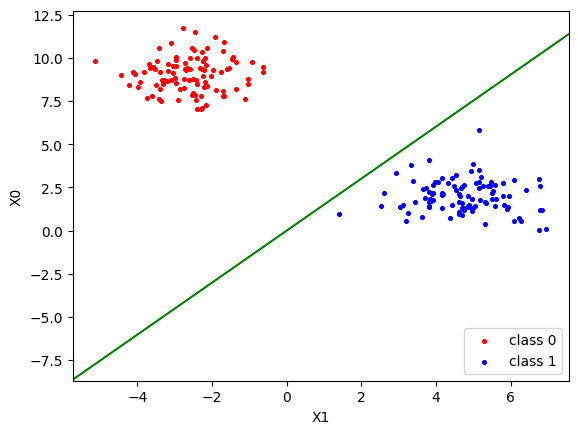

In [10]:
pcp = Perceptron(learning_rate=0.01)
pcp.fit(X,y,epochs=555)


y_pred = pcp.predict(X)
print(y_pred==y)
total = np.sum(y_pred==y)
score = total/len(y)
print(f'Score is {score}')

print(total)
# pcp.plot_decision_boundary(X,y)
visualize_output_2D(X,y,pcp.weights[1:],pcp.weights[0])